<a href="https://colab.research.google.com/github/dohaadel/Data-Mining/blob/main/Fine_tuning_01_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.models import Model

# Get class person and stop sign from coco dataset # New Section

In [ ]:
!pip install CocoDataset==0.1.2
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip /content/annotations_trainval2014.zip

In [ ]:
from coco_dataset import coco_dataset_download as cocod
class_name='stop sign'   
images_count=1500    
annotations_path='/content/annotations/instances_train2014.json' 
cocod.coco_dataset_download(class_name,images_count,annotations_path)

In [ ]:
from coco_dataset import coco_dataset_download as cocod
class_name='person'  
images_count=1500  
annotations_path='/content/annotations/instances_train2014.json'  
cocod.coco_dataset_download(class_name,images_count,annotations_path)

# Download the data to local system # New Section

In [ ]:
!zip -r /content/stop sign.zip /content/stop sign
!zip -r /content/person.zip /content/person

In [ ]:
from google.colab import files
files.download('/content/stop sign.zip')
files.download('/content/person.zip')

# split the data implement the following code in **pycharm** # New Section



In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
input_folder = r'C:\Users\dohaa\Downloads\split data\celImages'
output_folder = r'C:\Users\dohaa\Downloads\split data\celImages2'
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(.7, 0.2,0.1), group_prefix=None)

# New Section
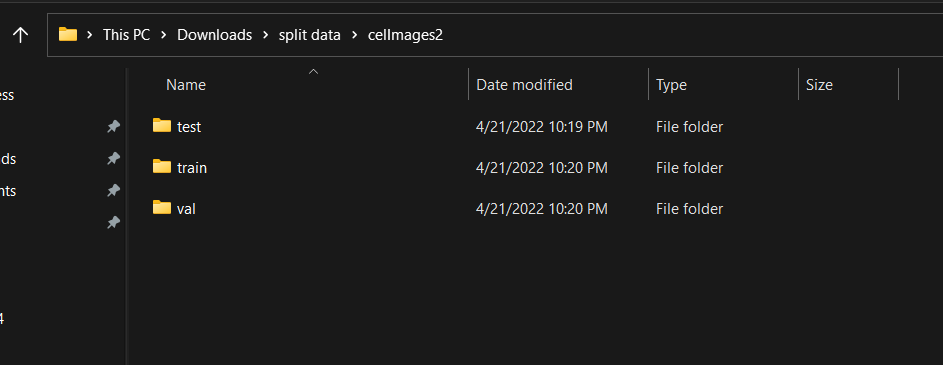



# connect to Drive # New Section

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_path="/content/gdrive/MyDrive/celImages2/train"
valid_path="/content/gdrive/MyDrive/celImages2/val"
test_path="/content/gdrive/MyDrive/celImages2/test"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224, 224) , batch_size=10
)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224, 224) , batch_size=10
)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224, 224) , batch_size=10 , shuffle=False
)

Found 1684 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 244 images belonging to 2 classes.


# load MobileNet model # New Section

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
model = keras.Sequential()
for layer in mobile.layers[:-1]:
    model.add(layer)

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(keras.layers.Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)      0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam' ,  metrics=['accuracy'])

model.fit(train_batches , validation_data=valid_batches ,steps_per_epoch=128 , validation_steps=10 , epochs=7 , verbose=2)

test_labels=test_batches.classes
predictions=model.predict(x=test_batches ,steps=len(test_batches),verbose=0)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(1))
cm

In [ ]:
true_positives=95
false_positives=25
false_negatives=26

# Precision and recall

In [ ]:
precicion=true_positives/(true_positives+false_positives)
print('percicion : %.3f ' % precicion)

recall=true_positives/(true_positives+false_negatives)
print('recall : %.3f ' % recall)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
print('Accuracy : %.3f ' % acc)


Summary of total calculations we get from mobileNet model 
*   Accuracy =  0.791
*   val_loss =  0.8701
*   val_accuracy = 0.7900
*   percicion = 0.792 
*   recall : 0.785 
*   confusion matrix = array([[95, 26],
       [25, 98]])











# Train the model using VGG16 

In [ ]:
imgs,labels =next(train_batches)

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 5s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = keras.Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(keras.layers.Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam' ,  metrics=['accuracy'])
model.fit(train_batches , validation_data=valid_batches ,steps_per_epoch=128 , validation_steps=10 , epochs=10 , verbose=2)

test_labels=test_batches.classes
predictions=model.predict(x=test_batches ,steps=len(test_batches),verbose=0)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(1))
cm

In [ ]:
true_positives=75
false_positives=2
false_negatives=46

# percision and recall 

In [ ]:
precicion=true_positives/(true_positives+false_positives)
print('percicion : %.3f ' % precicion)

In [ ]:
recall=true_positives/(true_positives+false_negatives)
print('recall : %.3f ' % recall)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
print('Accuracy : %.3f ' % acc)


# New Section

Summary of total calculations we get from VGG16 model 
*   Accuracy =  0.803           
*   val_loss =  0.2762 
*   val_accuracy = 0.9000 
*   percicion = 0.974            
*   recall : 0.620              
*   confusion matrix = array([[ 75,  46],
       [  2, 121]])

we Notive here that the accuracy of this model is better than what we got from MobileNet